The estimated Q1 differ between the new and old training datasets. This appears to be because [FSLI differs](#FSLI-is-different).

Does going back to v0.6 help?



In [1]:
%cd /home/disk/eos4/nbren12/work/uwnet

/home/disk/eos4/nbren12/work/uwnet


# FSLI is different

In [2]:
%matplotlib inline
import xarray as xr

In [3]:
def insert_forcing(ds):
        # Compute forcings
    for key in ['QT', 'SLI', 'U', 'V']:
        forcing_key = 'F' + key
        src = ds[key].diff('step') / ds.step.diff('step') / 86400
        src = src.isel(step=0).drop('step')
        ds[forcing_key] = src


td_8ab0f36 = xr.open_dataset("data/tmp/10.nc")
insert_forcing(td_8ab0f36)

td_8ab0f36

<xarray.Dataset>
Dimensions:  (step: 2, time: 1, x: 128, y: 64, z: 34)
Coordinates:
  * step     (step) float64 0.0 0.003471
  * time     (time) float64 101.9
  * x        (x) float32 0.0 160000.0 320000.0 ... 20160000.0 20320000.0
  * y        (y) float32 0.0 160000.0 320000.0 ... 9920000.0 10080000.0
  * z        (z) float32 37.0 112.0 194.0 288.0 ... 24000.0 25500.0 27000.0
Data variables:
    PP       (time, step, z, y, x) float32 ...
    QT       (time, step, z, y, x) float32 ...
    QV       (time, step, z, y, x) float32 ...
    SLI      (time, step, z, y, x) float32 ...
    TABS     (time, step, z, y, x) float32 ...
    U        (time, step, z, y, x) float32 ...
    V        (time, step, z, y, x) float32 ...
    W        (time, step, z, y, x) float32 ...
    p        (time, step, z) float32 ...
    FQT      (time, z, y, x) float64 -9.941e-06 -1.459e-05 ... 4.336e-36
    FSLI     (time, z, y, x) float64 -8.445e-06 -1.333e-05 ... 8.822e-05
    FU       (time, z, y, x) float64 0.00

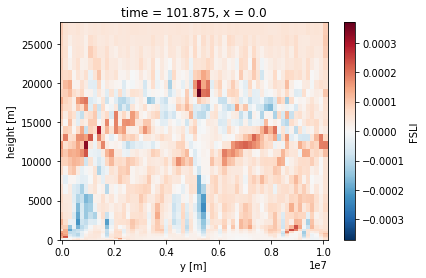

In [4]:
td_8ab0f36.FSLI[0,:,:,0].plot()

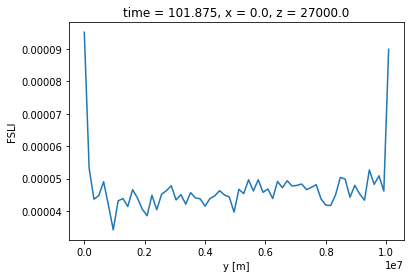

In [5]:
td_8ab0f36.FSLI[0,-1,:,0].plot()

results of git bisect

```
c2119ec72d6d9d7d4e31390240d81012f1548ab2 is the first bad commit
commit c2119ec72d6d9d7d4e31390240d81012f1548ab2
Author: Noah D. Brenowitz <nbren12@gmail.com>
Date:   Tue Nov 20 15:54:25 2018 -0800

    Add temperature hyper-diffusion

:040000 040000 a5538f296eec79540d8ae8c0aa7cb1c76de88a65 4eae81e5b37fe01d0b9349405f4511d4755d841d M	ext
```

This does make sense? Why would hyper-diffusion be an average heating source? It shouldn't be. Here is the horizontal picture of the top level of FSLI:

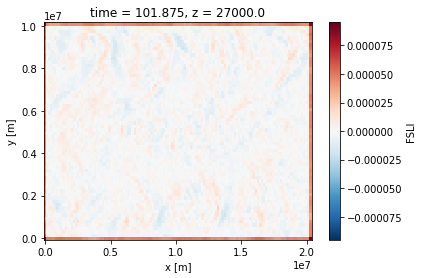

In [6]:
td_8ab0f36.FSLI[0, -1].plot()

The problem appears to be related to the boundary. This messed up my plots because they were at x=0.